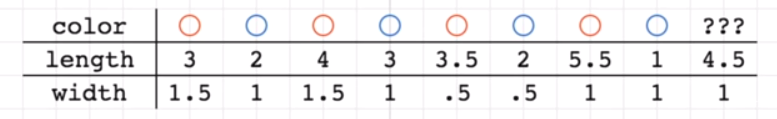

In [1]:
from PIL import Image
Image.open("problem.png")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.DataFrame({'length':[3,2,4,3,3.5,2,5.5,1,4.5],
                    'width':[1.5,1,1.5,1,.5,.5,1,1,1],
                    'color':[1,0,1,0,1,0,1,0,np.NaN]})
data

,color,length,width
0,1.0,3.0,1.5
1,0.0,2.0,1.0
2,1.0,4.0,1.5
3,0.0,3.0,1.0
4,1.0,3.5,0.5
5,0.0,2.0,0.5
6,1.0,5.5,1.0
7,0.0,1.0,1.0
8,NaN,4.5,1.0


[0, 6, 0, 6]

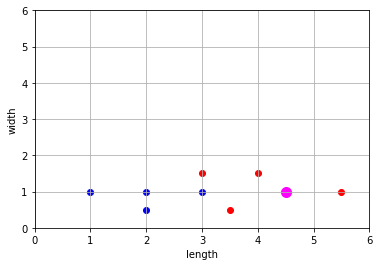

In [4]:
# Graph points
for i in range(len(data) - 1):
    if data['color'].values[i] == 1:
        plt.scatter(data['length'].values[i], data['width'].values[i], c = 'r')
    elif data['color'].values[i] == 0:
        plt.scatter(data['length'].values[i], data['width'].values[i], c = 'b')
        
plt.scatter(4.5, 1.0, color='magenta', s=100)
plt.grid()
plt.xlabel('length')
plt.ylabel('width')
plt.axis([0,6,0,6])

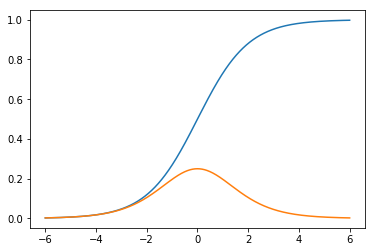

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
    # sigmoid = 1/(1+e^-z) (activation function)
    # cost function: (prediction - target)^2 -> (1/(1+e^(l*w1+w*w2+b)) - 1)^2

def der_sig(z):
    return sigmoid(z) - sigmoid(z) ** 2
# Plot sigmoid function:
x = np.linspace(-6,6,1000)
y = sigmoid(x)
y_der = der_sig(x)

plt.plot(x , y)
plt.plot(x, y_der)

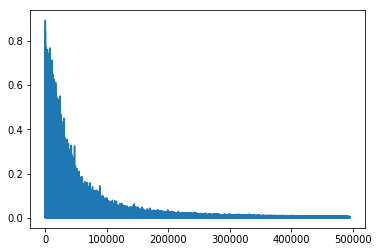

In [6]:
target = data['color'].values
def NN(l, w, w1, w2, b):
    return l*w1 + w*w2 + b
w1 = 0
w2 = 0
b = 0
# Loop through all the point, calculate the COST FUNCTION
costs = []
for j in range(500000):
    i = np.random.randint(len(data) - 1)
    
    neunet = NN(data.values[i, 1], data.values[i, 2], w1, w2, b)
    prediction = sigmoid(neunet)
    cost = (prediction - target[i])**2
        
    dcost_dpred = 2 * (prediction - target[i])
    dpred_dneunet = der_sig(neunet)
                    
    dneunet_dw1 = data.values[i, 1]
    dneunet_dw2 = data.values[i, 2]
    dneunet_db = 1
    # Calculate the DERIVATIVE of COST FUNCTION w/r.t. w1, w2, b
    dcost_dw1 = dcost_dpred * dpred_dneunet * dneunet_dw1 # chain rule
    dcost_dw2 = dcost_dpred * dpred_dneunet * dneunet_dw2
    dcost_db = dcost_dpred * dpred_dneunet * dneunet_db
                    
    # Update w1, w2, w3 over time:
    w1 = w1 - 0.5*dcost_dw1 # w1_gradient
    w2 = w2 - 0.5*dcost_dw2
    b = b - 0.5*dcost_db
        
    if j % 100:
        costs.append(cost)
plt.plot(costs)

In [7]:
print(w1)
print(w2)
print(b)

22.710961772051803
11.164973648792161
-81.92923703067801


In [8]:
def which_flower(l, w):
    return sigmoid(NN(l,w,w1,w2,b))
which_flower(3,1)

0.06714608051099867

(0.0, 5.995)

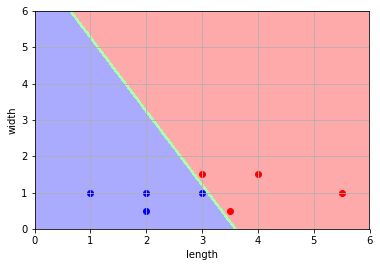

In [9]:
#MESH
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
#generate all the points in the plane using np.meshgrid(np.arange(x_min, x_min, super_small))
xx, yy = np.meshgrid(np.arange(0, 6, .005), np.arange(0, 6, .005))
Z = which_flower(xx.ravel(),yy.ravel())
Z = Z.reshape(xx.shape)
plt.figure()
# xx, yy are ALL the points in the plane, Z is the color of each area
# then plot the points using plt.scatter as usual
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

# Graph points
for i in range(len(data) - 1):
    if data['color'].values[i] == 1:
        plt.scatter(data['length'].values[i], data['width'].values[i], c = 'r')
    elif data['color'].values[i] == 0:
        plt.scatter(data['length'].values[i], data['width'].values[i], c = 'b')
plt.grid()
plt.xlabel('length')
plt.ylabel('width')
plt.axis([0,6,0,6])

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
#------x_min x_max y_min y_max